# Zadanie 18.3: model klasyfikacji
Stwórz model klasyfikacji, w oparciu o architekturę sieci neuronowych. Naucz model klasyfikować gatunki kwiatów, wykorzystując zbiór Iris.

In [1]:
# Załadowanie bibliotek

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Załadowanie danych Iris

data = load_iris()
X = data.data
y = data.target.reshape(-1, 1)

In [3]:
# Podział danych na treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Budowa modelu
model = Sequential([
    Dense(10, activation='relu', input_shape=(X.shape[1],)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')  # 3 klasy
])

In [5]:
# Wybór optymalizatora
optimizer = Adam(learning_rate=0.01)

In [6]:
# Kompilacja modelu
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Scheduler zmiany learning rate
def scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch != 0:
        return lr * 0.9
    return lr

lr_scheduler = LearningRateScheduler(scheduler)

In [8]:
# Trening modelu
model.fit(X_train, y_train,
          epochs=100,
          batch_size=16,
          validation_data=(X_test, y_test),
          callbacks=[lr_scheduler])

Epoch 1/100
8/8 [==============================] - 1s 42ms/step - loss: 1.0395 - accuracy: 0.5417 - val_loss: 0.8810 - val_accuracy: 0.3667 - lr: 0.0100
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8420 - accuracy: 0.6000 - val_loss: 0.7538 - val_accuracy: 0.8000 - lr: 0.0100
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7142 - accuracy: 0.8333 - val_loss: 0.6351 - val_accuracy: 0.8000 - lr: 0.0100
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6015 - accuracy: 0.7750 - val_loss: 0.5434 - val_accuracy: 0.8000 - lr: 0.0100
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5110 - accuracy: 0.8833 - val_loss: 0.4709 - val_accuracy: 0.8667 - lr: 0.0100
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4503 - accuracy: 0.9167 - val_loss: 0.4214 - val_accuracy: 0.8333 - lr: 0.0100
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4033 - accurac

In [9]:
# Sprawdzanie dokładności modelu
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

1/1 [==============================] - 0s 17ms/step - loss: 0.0768 - accuracy: 0.9667
Loss: 0.07677360624074936, Accuracy: 0.9666666388511658


In [10]:
# Predykcja na danych testowych
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)

# Wyświetlenie wyników
print(y_pred)
print(y_test.flatten())

1/1 [==============================] - 0s 78ms/step
[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


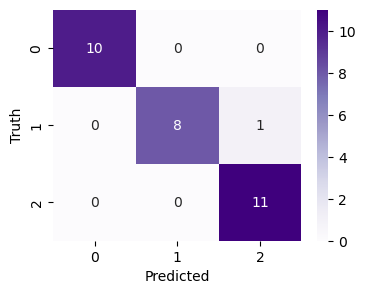

In [11]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, cmap='Purples', annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [12]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

